<a href="https://colab.research.google.com/github/08vani/Basic_Assembler/blob/master/Assignment2_Question2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
qid = []
f=open("/content/drive/MyDrive/IR-assignment-2-data.txt",'r')
total = 0
relevance_score={}
ind=0
for i in f.readlines():
    #print(i)
    p = i.split(" ")
    
    if p[1] == 'qid:4':
        relevance_score[ind]=p[0]
        ind+=1
        if int(i.split(" ")[0]) > 0:
            qid.append([1, float(i.split(" ")[76].split(":")[1])])
            total += 1
        else:
            qid.append([0, float(i.split(" ")[76].split(":")[1])])
    else:
        continue
        
relevance_score={key:val for key,val in relevance_score.items() }
relevance_score1=relevance_score
print(ind)
#print(relevance_score)

103


In [4]:
relevance_score1=dict(sorted(relevance_score1.items(),key=lambda kv:kv[1],reverse=True))
#print(relevance_score1)

In [7]:
import math
def DCG(relevance_score):
    maxscore=0
    for i in range (1,len(relevance_score),1):
        maxscore+=(float(relevance_score[i-1])/(math.log((i+1),2)))
    print(maxscore)
    return float(maxscore)

In [8]:
rel_list=[]
rel_list_sorted=[]
rel_unique=[0]*5

for i in relevance_score.keys():
    rel_list.append(relevance_score[i])
    if(relevance_score[i]=='0'):
        rel_unique[0]+=1
    if(relevance_score[i]=='1'):
        rel_unique[1]+=1
    if(relevance_score[i]=='2'):
        rel_unique[2]+=1
    if(relevance_score[i]=='3'):
        rel_unique[3]+=1
    if (relevance_score[i]=='4'):
        rel_unique[4]+=1
  

for i in relevance_score1.keys():
    rel_list_sorted.append(relevance_score1[i])

dcg=DCG(rel_list)
idcg=DCG(rel_list_sorted)
ndcg=dcg/idcg
print(ndcg)
print(rel_unique)

12.337484420604602
19.407247618668023
0.6357153091990775
[59, 26, 17, 1, 0]


In [10]:
f=open("/content/drive/MyDrive/IR-assignment-2-data.txt",'r')
output_file=open("output_file_url.txt","w")
cnt=0
for i in f.readlines():
    #print(i)
    if cnt in relevance_score.keys():
        output_file.writelines(i)
    cnt+=1

In [11]:
qid=sorted(qid,key=lambda x:x[1],reverse=True)
print(qid)
count = 1

precision = []
recall = []

classified = 0

for i in [m[0] for m in qid]:
    precision.append(classified/count)
    recall.append(classified/total)
    if i == 1:
        classified += 1
    count += 1

[[0, 972.826451], [0, 612.893205], [0, 571.500533], [0, 538.388954], [1, 528.520116], [0, 463.099129], [1, 439.396463], [1, 411.010633], [0, 316.319283], [1, 311.705149], [0, 305.102064], [1, 296.023694], [1, 292.184568], [1, 270.13233], [1, 237.21632], [1, 237.21632], [0, 226.444023], [1, 217.848266], [0, 212.401296], [1, 202.442155], [0, 201.720933], [1, 200.840161], [0, 200.840161], [1, 198.480212], [1, 192.953467], [1, 188.936782], [0, 188.129935], [0, 187.934366], [0, 186.375414], [0, 185.617459], [0, 180.720002], [1, 180.24324], [0, 177.168378], [1, 176.875026], [0, 176.000104], [0, 169.844071], [1, 166.683125], [1, 161.455583], [0, 161.455583], [1, 161.15638], [1, 157.05992], [1, 156.301965], [0, 148.415271], [0, 148.415271], [0, 144.564444], [0, 143.769297], [1, 143.445062], [0, 142.9683], [1, 142.589323], [0, 142.589323], [1, 142.038637], [1, 140.479685], [0, 130.655061], [1, 121.96152], [1, 121.814843], [0, 121.007996], [1, 108.548081], [1, 103.400313], [0, 98.418404], [1, 98

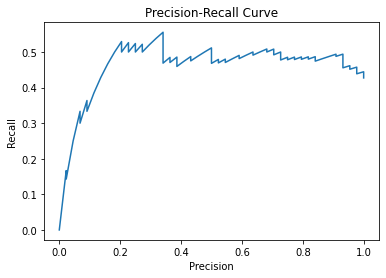

In [13]:
import matplotlib.pyplot as plt
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve')
plt.plot(recall, precision)
plt.show()